<a href="https://colab.research.google.com/github/Savanaarnett/Data_science/blob/main/Savana_Arnett_Stats_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


In [41]:
#Always have to import all of the programs so python can run the data how you intended it to.

In [1]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [42]:
#This coding allows for the program to accsses the url that will be coded for after this function.

In [2]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [43]:
#This link that is input downloads the models that are needed for when the program is run.

In [3]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [44]:
#This is the url that is needed to display the images. The coding sets the command "url" to actually equal the input link.

In [6]:
url = "https://docs.google.com/presentation/d/1011J0kg2RdmulLH-8DTx1RIMLCZtizCkLjgO5CPPJrk/edit#slide=id.g19b8867b70f_0_176"

In [45]:
#The coding "for image in get_slides(url)" has the program access the google slides and takes the data(images) out of the slides and brings it into this lab book.

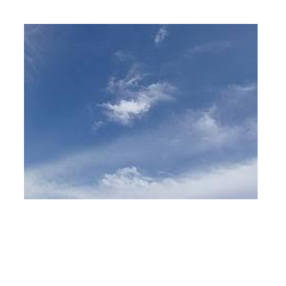

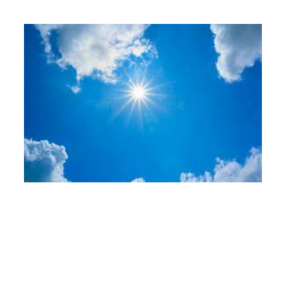

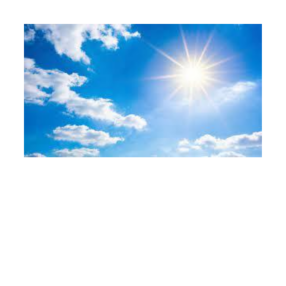

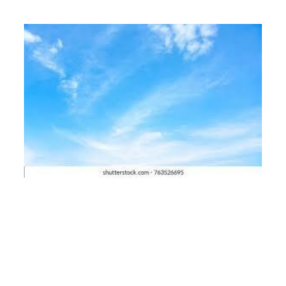

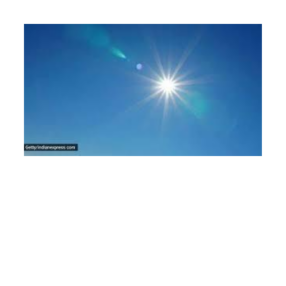

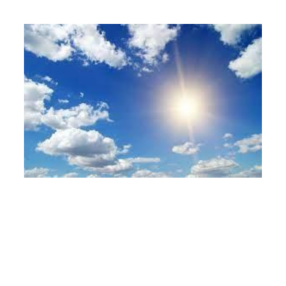

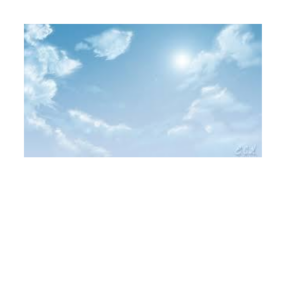

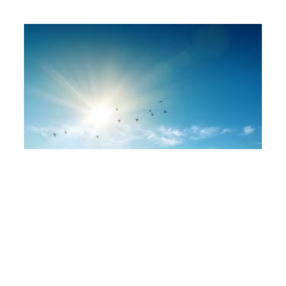

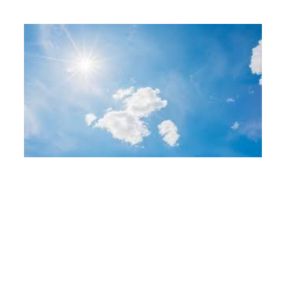

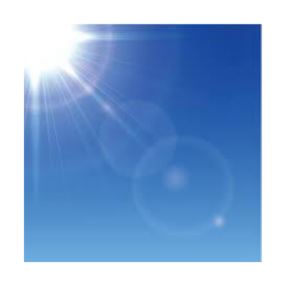

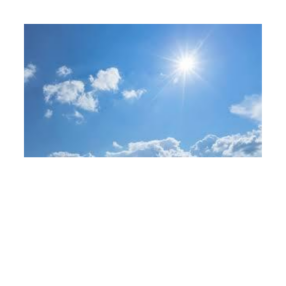

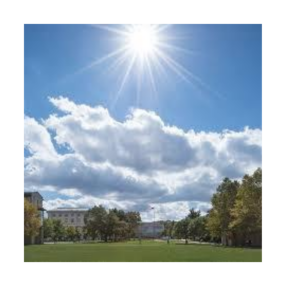

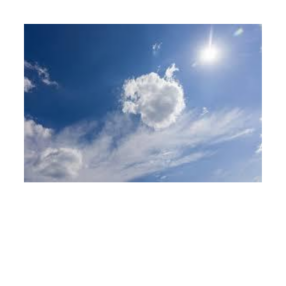

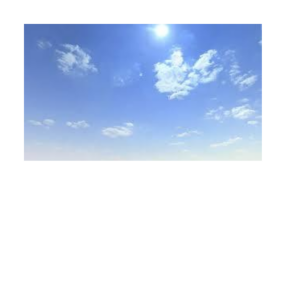

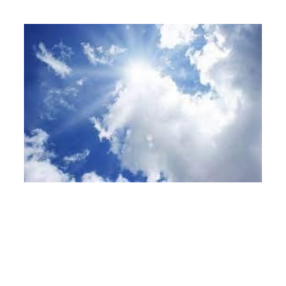

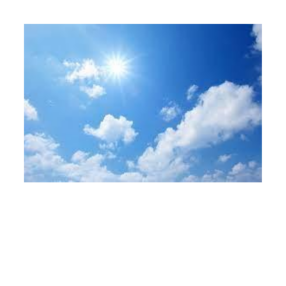

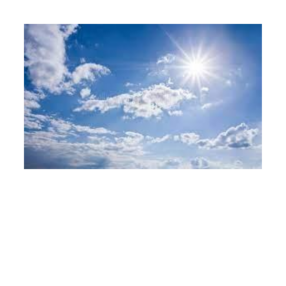

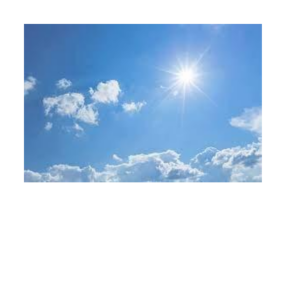

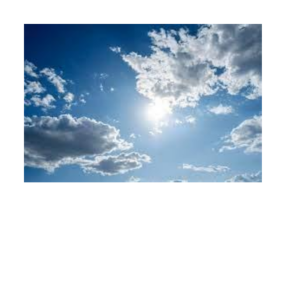

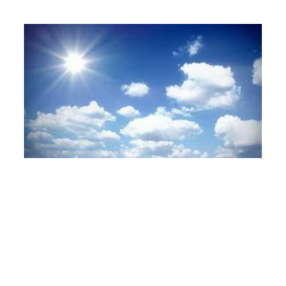

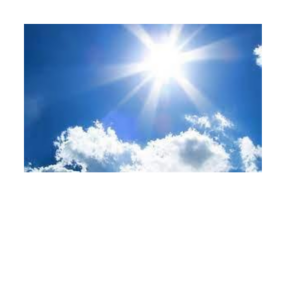

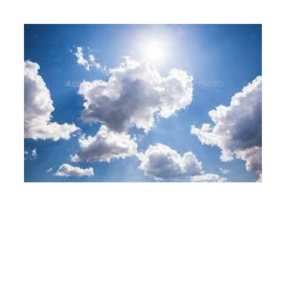

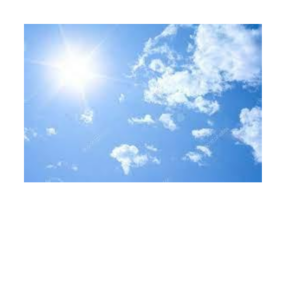

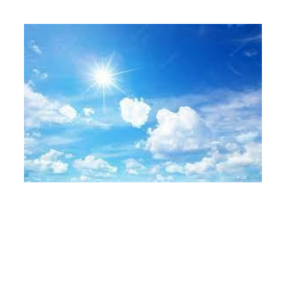

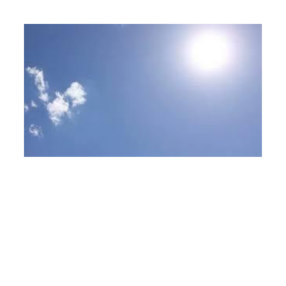

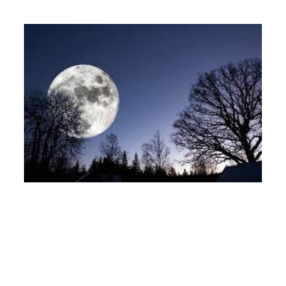

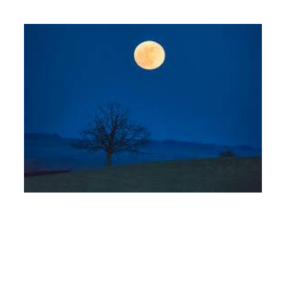

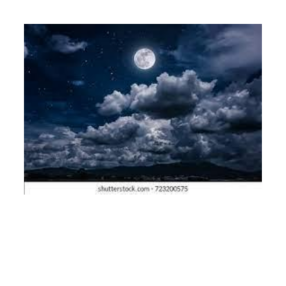

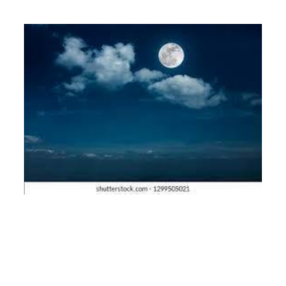

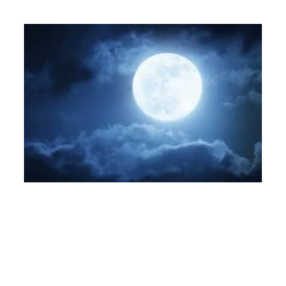

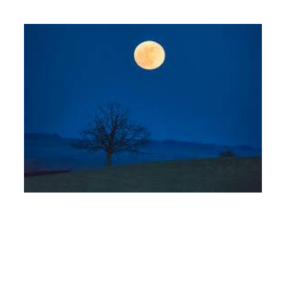

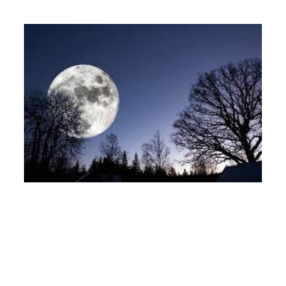

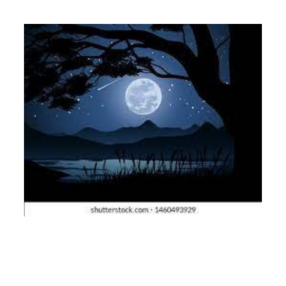

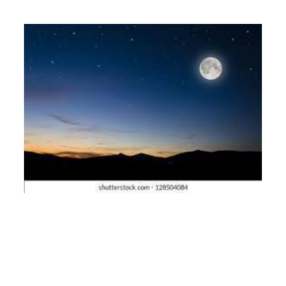

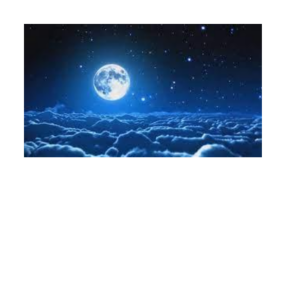

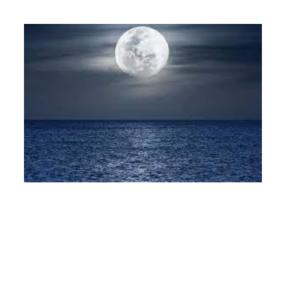

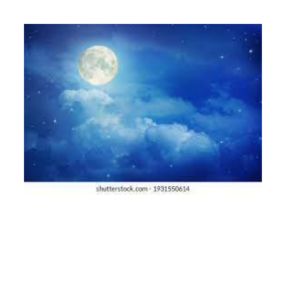

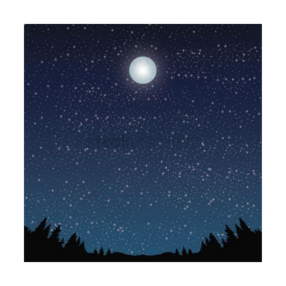

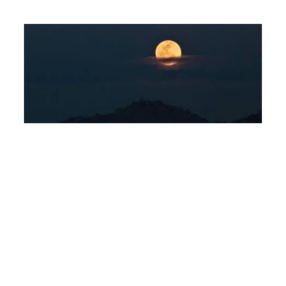

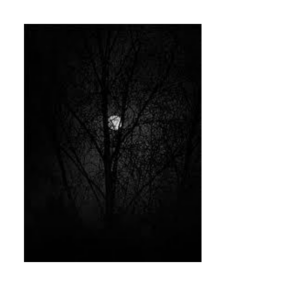

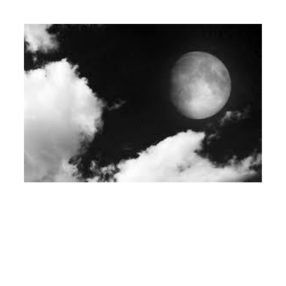

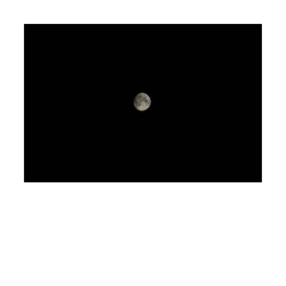

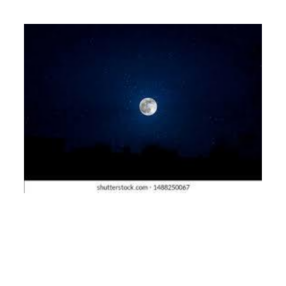

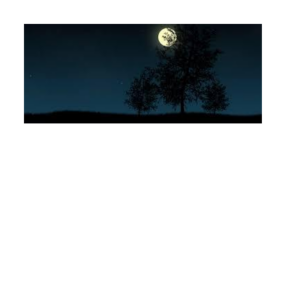

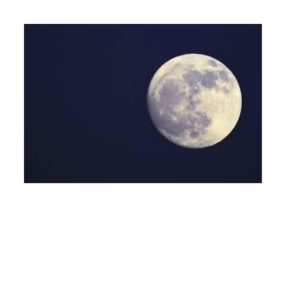

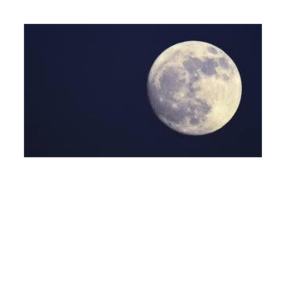

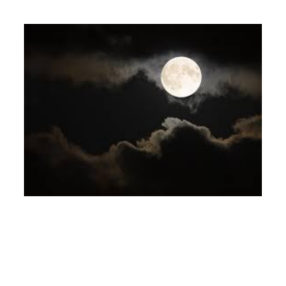

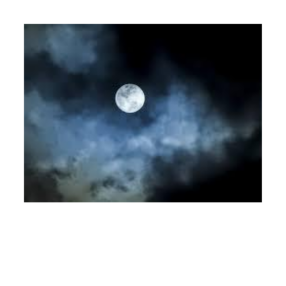

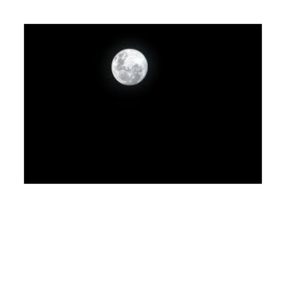

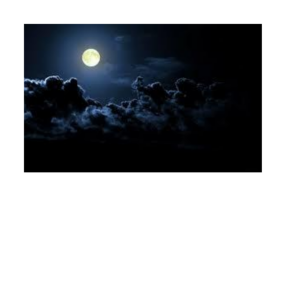

In [7]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [46]:
#This gives the demensions of the data input above.

In [8]:
images.shape

torch.Size([50, 3, 224, 224])

In [9]:
model(images)

tensor([[-0.6791, -1.6611, -0.0635,  ..., -5.0474,  0.2535,  0.8898],
        [-1.0220,  0.4083, -0.0507,  ..., -4.9029,  0.3816,  2.2634],
        [-0.2044,  0.4789, -1.5695,  ..., -4.3821,  2.1694,  0.3333],
        ...,
        [ 0.0358,  0.2458, -1.4795,  ..., -3.1981, -0.2973,  1.0581],
        [-3.0629, -2.1833, -2.4772,  ..., -2.7192, -0.3376,  2.1725],
        [-1.6701, -1.2172, -1.0620,  ..., -2.7192, -0.9607,  0.4545]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [47]:
#The "y" is set equal to the model images that was just coded for in the above cell.

In [10]:
y = model(images)

In [48]:
#The "shape" gives the dimensions of the now coded for "y".

In [11]:
y.shape

torch.Size([50, 1000])

In [49]:
#The "guesses" is set equal to the functions of the torch.argmax(y,1).cpu().numpy()

In [12]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [50]:
#This list basically guesses what each image is supposed to be.

In [13]:
for i in list(guesses):
    print(labels[i])

seashore, coast, seacoast, sea-coast
web site, website, internet site, site
seashore, coast, seacoast, sea-coast
web site, website, internet site, site
seashore, coast, seacoast, sea-coast
web site, website, internet site, site
web site, website, internet site, site
seashore, coast, seacoast, sea-coast
web site, website, internet site, site
screen, CRT screen
web site, website, internet site, site
rapeseed
sandbar, sand bar
web site, website, internet site, site
sandbar, sand bar
seashore, coast, seacoast, sea-coast
web site, website, internet site, site
web site, website, internet site, site
seashore, coast, seacoast, sea-coast
sandbar, sand bar
rapeseed
trailer truck, tractor trailer, trucking rig, rig, articulated lorry, semi
web site, website, internet site, site
web site, website, internet site, site
web site, website, internet site, site
golf ball
screen, CRT screen
screen, CRT screen
screen, CRT screen
golf ball
screen, CRT screen
golf ball
monitor
cleaver, meat cleaver, chopper

In [14]:
Y = np.zeros(50,)
Y[25:] = 1

In [51]:
#When "y" is input it gives the array of numbers within the Y.

In [15]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [52]:
#The "x" is set equal to the funtion y.detach().cpu().numpy()

In [16]:
X = y.detach().cpu().numpy() 

In [53]:
#This gives the demensions for the x.

In [17]:
X.shape

(50, 1000)

In [54]:
#The data is plotted because the code "plt.plot" was input.

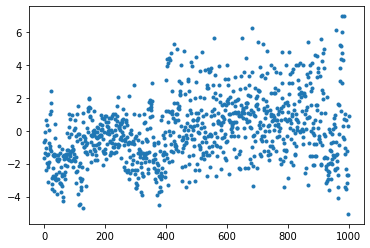

In [18]:
plt.plot(X[0],'.')

In [55]:
#The data of "x" is given when "0" is input.

In [19]:
X[0]

array([-6.79073989e-01, -1.66106987e+00, -6.35255575e-02, -1.36416006e+00,
       -5.90159595e-01, -2.41426444e+00,  6.28620386e-01, -1.08088982e+00,
       -1.47958350e+00,  3.44074249e-01, -1.97406268e+00, -2.00040507e+00,
       -2.19543934e+00, -1.43415546e+00, -3.13980412e+00, -7.67920196e-01,
        5.38507104e-02, -1.91819012e+00,  1.03208137e+00, -1.13970244e+00,
       -9.54986513e-01,  2.43553090e+00,  1.66529989e+00,  1.18749654e+00,
       -1.24258530e+00, -3.53359270e+00, -3.20713830e+00, -2.87050200e+00,
       -2.76064682e+00, -2.27392340e+00, -1.45259356e+00, -1.43760073e+00,
       -3.63067245e+00, -1.54975331e+00,  3.96602005e-01, -2.91789818e+00,
       -4.38815534e-01, -2.83896327e+00, -2.96338463e+00, -1.45480490e+00,
       -2.63899899e+00, -3.86021876e+00, -1.72952068e+00, -1.78467929e+00,
       -1.82452524e+00, -2.90920019e+00, -1.74433720e+00, -1.47670388e+00,
       -2.49171567e+00, -1.69219947e+00, -9.10082698e-01, -1.35824144e+00,
       -3.14547729e+00, -

In [20]:
np.argmax(X[0])

978

In [56]:
#When 'labels' is input along with a number it gives the certain name that is attatched to that number through the data of the program.

In [21]:
labels[948]

'Granny Smith'

In [57]:
#This codes for the top ten of the data.

In [22]:
top_ten = np.argsort(X[0])[::-1][0:10]

In [58]:
#An input of "top_ten" was given and an output of the following 10 labels were printed.

In [23]:
for i in top_ten:
    print(labels[i])

seashore, coast, seacoast, sea-coast
rapeseed
obelisk
hay
sandbar, sand bar
megalith, megalithic structure
flagpole, flagstaff
wing
parachute, chute
trailer truck, tractor trailer, trucking rig, rig, articulated lorry, semi


In [59]:
#These are all of the labels there was no range put with it.

In [24]:
labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

In [60]:
#This "plt.hist" plots a histogram with the data that is calculated in the lab.

(array([ 12.,  68., 168., 238., 223., 152.,  66.,  48.,  20.,   5.]),
 array([-5.0473523 , -3.8488104 , -2.6502688 , -1.4517269 , -0.25318518,
         0.9453566 ,  2.1438985 ,  3.3424401 ,  4.540982  ,  5.739524  ,
         6.9380655 ], dtype=float32),
 <a list of 10 Patch objects>)

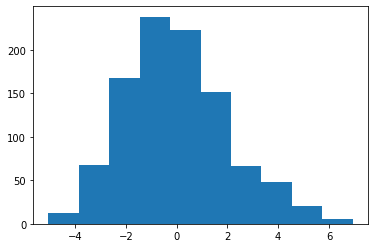

In [25]:
plt.hist(X[0])

In [61]:
#This sets both "x" and "y" equal to the "gpu_data" function.

In [26]:
X = GPU_data(X)
Y = GPU_data(Y)

In [27]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [62]:
#This function below brings the "cross_entropy" into the data.

In [28]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [29]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [30]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [31]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [63]:
#This gives the dimentions of the X.

In [32]:
X.shape

torch.Size([50, 1000])

In [64]:
#The "get_batch" allows the program to run things in a "batch"/multiple.

In [33]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [65]:
#The input of "model(x,w)" was inserted and it gives an output of the function "x@w"

In [34]:
def model(x,w):

    return x@w[0]

In [35]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [66]:
#This coding below allows the program to run the data and calculate/understand the models its looking at. It should be run multiple times to gather more knowledge from the data.

In [38]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


acc_train,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
acc_train,0.9375
loss,0.37576


<ipython-input-2-4608b466ff03>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


https://tensorspace.org/

In [39]:
#The greatest loss of the runs was 0.3758 and the smallest of the loss was 0.3133 the average of the data was 0.3758 because both of the 1st runs contained this number.